### udp通信模型
udp通信模型中，在通信开始之前，不需要建立相关的链接，只需要发送数据即可，类似于生活中，"写信""
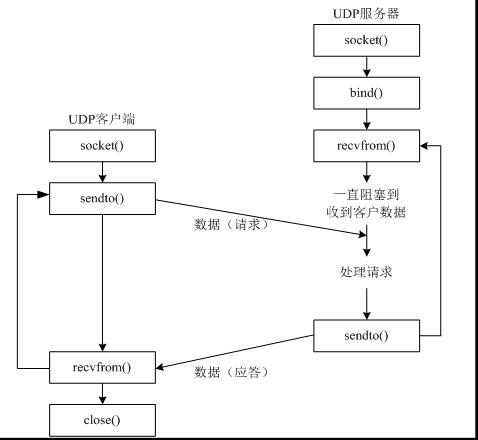

### tcp通信模型
udp通信模型中，在通信开始之前，一定要先建立相关的链接，才能发送数据，类似于生活中，"打电话""
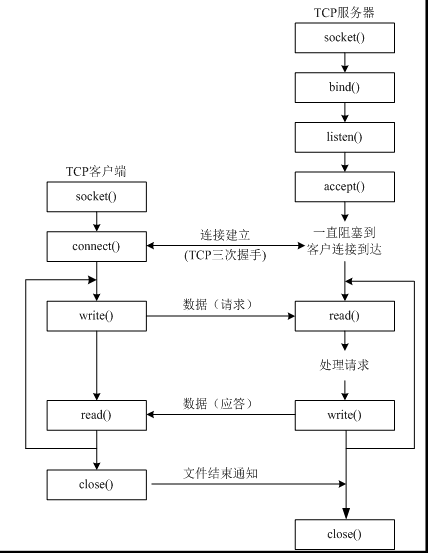

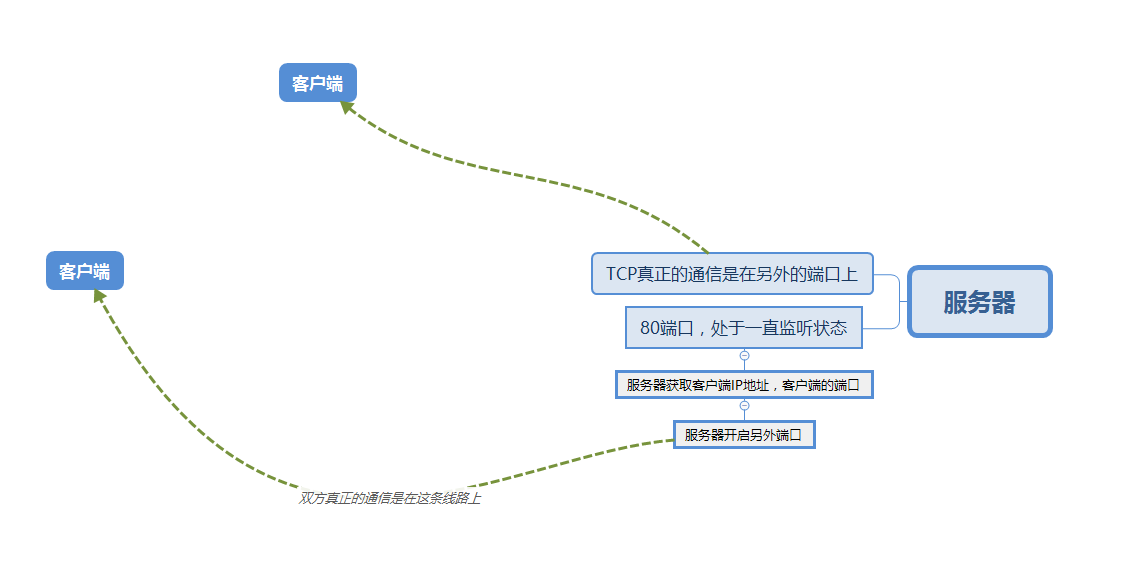

### tcp服务器
#### 案例：生活中的电话机
如果想让别人能更够打通咱们的电话获取相应服务的话，需要做一下几件事情：

1. 买个手机
2. 插上手机卡
3. 设计手机为正常接听状态（即能够响铃）
4. 静静的等着别人拨打

**tcp服务器**:如同上面的电话机过程一样，在程序中，如果想要完成一个tcp服务器的功能，需要的流程如下：

1. socket创建一个套接字
2. bind绑定ip和port
3. listen使套接字变为可以被动链接
4. accept等待客户端的链接
5. recv/send接收发送数据
一个很简单的tcp服务器如下：

In [2]:
#coding=utf-8
from socket import *

# 创建TCPsocket服务器,socket的第二个参数,sock_stream,
tcpSerSocket = socket(AF_INET, SOCK_STREAM)

# 绑定本地信息
address = ('192.168.132.1', 6777)
tcpSerSocket.bind(address)
# tcpSerSocket.bind(('',7788))

# 使用socket创建的套接字默认的属性是主动的，使用listen将其变为被动的，这样就可以接收别人的链接了
tcpSerSocket.listen(5)

# 如果有新的客户端来链接服务器，那么就产生一个新的套接字专门为这个客户端服务器
# newSocket用来为这个客户端服务
# tcpSerSocket就可以省下来专门等待其他新客户端的链接

#新端口连接好了，你要获取这个连接的管道，那么你需要解构accept的返回值
print('-----等待客户端连接进来-----')
newSocket, clientAddr = tcpSerSocket.accept()
print(newSocket)
print(clientAddr)
print('-----客户端已连接进来')

# 接收对方发送过来的数据，最大接收1024个字节
print('-----等待获取客户端的消息-----')
recvData = newSocket.recv(1024)
print ('接收到的数据为:',recvData.decode('gbk'))

# 发送一些数据到客户端
newSocket.send(b"thank you !")

# 关闭为这个客户端服务的套接字，只要关闭了，就意味着为不能再为这个客户端服务了，如果还需要服务，只能再次重新连接
newSocket.close()

# 关闭监听套接字，只要这个套接字关闭了，就意味着整个程序不能再接收任何新的客户端的连接
tcpSerSocket.close()

-----等待客户端连接进来-----
<socket.socket fd=1268, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.132.1', 6777), raddr=('192.168.132.1', 50356)>
('192.168.132.1', 50356)
-----客户端已连接进来
-----等待获取客户端的消息-----
接收到的数据为: b'\xd6\xd0\xce\xc4\xcd\xf8'


In [11]:
a = ('ip地址','192.168.1.1')
type(a)
c,d = a
print('c:',c)
print('d:',d)

c: ip地址
d: 192.168.1.1


### tcp客户端
tcp客户端，并不是像之前一个段子：一个顾客去饭馆吃饭，这个顾客要点菜，就问服务员咱们饭店有客户端么，然后这个服务员非常客气的说道：先生 我们饭店不用客户端，我们直接送到您的餐桌上

如果，不学习网络的知识是不是 说不定也会发生那样的笑话 ，哈哈

所谓的服务器端：就是提供服务的一方，而客户端，就是需要被服务的一方

### tcp客户端构建流程
tcp的客户端要比服务器端简单很多，如果说服务器端是需要自己买手机、查手机卡、设置铃声、等待别人打电话流程的话，那么客户端就只需要找一个电话亭，拿起电话拨打即可，流程要少很多

In [3]:
#coding=utf-8
from socket import *

# 创建socket，Tcpshock创建
tcpClientSocket = socket(AF_INET, SOCK_STREAM)

# 链接服务器
serAddr = ('192.168.132.1', 6777)
#请输入服务端的IP地址
# serverIp = input('请输入服务端的IP地址：')
# serverPort = int(input('请输入服务器的端口号：'))

# serAddr = (serverIp,serverPort)
#拨打电话，连接服务端
tcpClientSocket.connect(serAddr)

# 提示用户输入数据
sendData = input("请输入要发送的数据：")

tcpClientSocket.send(sendData.encode('gbk'))

# 接收对方发送过来的数据，最大接收1024个字节
recvData = tcpClientSocket.recv(1024)
print ('接收到的数据为:',recvData.decode('gbk'))

# 关闭套接字，挂电话
tcpClientSocket.close()

请输入要发送的数据：你好服务器
接收到的数据为: 好的，已收到


### 应用：模拟QQ聊天
客户端参考代码

In [12]:
%%writefile qqClient.py
#coding=utf-8
from socket import *

# 创建socket
tcpClientSocket = socket(AF_INET, SOCK_STREAM)

# 链接服务器
serAddr = ('192.168.132.1', 7788)
tcpClientSocket.connect(serAddr)

while True:

    # 提示用户输入数据
    sendData = input("send：")
    
    if sendData == 'exit Sever':
        print('退出连接')
        break
    elif len(sendData)>0:
        tcpClientSocket.send(sendData.encode('gbk'))
    else:
        print("退出连接")
        break

    # 接收对方发送过来的数据，最大接收1024个字节
    recvData = tcpClientSocket.recv(1024)
    print ('recv:',recvData.decode('gbk'))

# 关闭套接字
tcpClientSocket.close()

Overwriting qqClient.py


#### 服务器端参考代码

In [11]:
%%writefile qqServer.py
#coding=utf-8
from socket import *

# 创建socket
tcpSerSocket = socket(AF_INET, SOCK_STREAM)

# 绑定本地信息
address = ('', 7788)
tcpSerSocket.bind(address)

# 使用socket创建的套接字默认的属性是主动的，使用listen将其变为被动的，这样就可以接收别人的链接了
tcpSerSocket.listen(5)

while True:
    #一个循环服务1个客户
    # 如果有新的客户端来链接服务器，那么就产生一个信心的套接字专门为这个客户端服务器
    # newSocket用来为这个客户端服务
    # tcpSerSocket就可以省下来专门等待其他新客户端的链接
    print('------等待客户连接------')
    newSocket, clientAddr = tcpSerSocket.accept()
    print('------新客户已连接')
    while True:

        # 接收对方发送过来的数据，最大接收1024个字节
        recvData = newSocket.recv(1024)
        print(recvData)
        # 如果接收的数据的长度为0，则意味着客户端关闭了链接
        if recvData==b'exit server':
            print('客户已完成服务，退出')
            break
        elif len(recvData)>0:
            print ('recv:',recvData.decode('gbk'))
        else:
            print('客户已完成服务，退出')
            break
            

        # 发送一些数据到客户端
        # sendData = input("send:")
        sendDate = '服务端已收信息：%s'%recvData.decode('gbk')
        newSocket.send(sendDate.encode('gbk'))

    # 关闭为这个客户端服务的套接字，只要关闭了，就意味着为不能再为这个客户端服务了，如果还需要服务，只能再次重新连接
    newSocket.close()

# 关闭监听套接字，只要这个套接字关闭了，就意味着整个程序不能再接收任何新的客户端的连接
tcpSerSocket.close()

Overwriting qqServer.py


In [10]:
b'exit server'==b'exit server'

True